In [1]:
import numpy as np
from qiskit import *
import math as m
from scipy import linalg as la
%matplotlib inline

In [2]:
# the density operators were a way of describing possible states of a quantum system,
# or equivalently possible outcomes of measurements, 
# in a way very similar to probability distributions.

# Density Matrix
# rho = 1/3|l><l| + 2/3|0><0|

rho = np.matrix( [[5/6, 1/6],
                  [1/6, 1/6]] )
print(rho)

[[0.83333333 0.16666667]
 [0.16666667 0.16666667]]


In [3]:
# matrix logarithm

la.logm(rho)

array([[-0.23779441,  0.43040894],
       [ 0.43040894, -1.95943017]])

In [4]:
# Base change for logarithm
# (To get the appropriate base 2)

la.logm(rho) / la.logm( np.matrix( [[2]] ) )

array([[-0.34306481,  0.62094884],
       [ 0.62094884, -2.82686019]])

In [5]:
# compute the von Neumann entropy using the trace of this matrix 
# numpy.matrix.trace Return the sum along diagonals of the array.
 
S = -np.matrix.trace( rho * ( la.logm(rho) / la.logm( np.matrix([[2]]) ) ) )
print(S)

[[0.55004776]]


# von_neumann_entropy(rho)

In [6]:
#  Let’s define a function for density matrices that computes the von Neumann entropy.

def von_neumann_entropy(rho):
    import numpy as np
    from scipy import linalg as la
    
    R = rho * ( la.logm(rho) / la.logm( np.matrix([[2]]) ) )
    #print("\nR = ")
    #print(R)
    
    S = -np.matrix.trace(R)
    #print("\nS = ")
    #print(S)
    
    return S
    

In [7]:
von_neumann_entropy(rho)

matrix([[0.55004776]])

# State Evolution

In [8]:
# There are two important kinds of states called mixed states and pure states. 

# Pure states can always be represented as the “outer product” of a state vector with itself. 
# Mixed states are generally expressed as a sum of orthogonal state vectors. 

# In the case of pure states, the von Neumann entropy is always zero. 
# In the case of mixed states, the entropy can be a whole range of values. 


#  an example where a system evolves from a pure state to a mixed state and then back to a pure state again. 
# We will see the von Neumann entropy gradually increases and then decreases back to zero. 


# define spin-up
u = np.matrix( [[1], 
                [0]] )
print("\nu = ")
print(u)

# define spin-down
d = np.matrix( [[0], 
                [1]] )
print("\nd = ")
print(d)

# define the pure state |0><0|
P11 = np.dot( u, u.getH() )
print("\nP11 = ")
print(P11)

# define the pure state |1><1|
P22 = np.dot( d, d.getH() )
print("\nP22 = ")
print(P22)

# numpy.matrix.H = Returns the (complex) conjugate transpose of self.
# numpy.dot = Dot product of two arrays. 


u = 
[[1]
 [0]]

d = 
[[0]
 [1]]

P11 = 
[[1 0]
 [0 0]]

P22 = 
[[0 0]
 [0 1]]


In [9]:
# plot the evolution 

import matplotlib.pyplot as plt

p = np.arange( 0.001, 1., 0.01 )
print("\np = ")
print(p)
# numpy.arange = Return evenly spaced values within a given interval.



p = 
[0.001 0.011 0.021 0.031 0.041 0.051 0.061 0.071 0.081 0.091 0.101 0.111
 0.121 0.131 0.141 0.151 0.161 0.171 0.181 0.191 0.201 0.211 0.221 0.231
 0.241 0.251 0.261 0.271 0.281 0.291 0.301 0.311 0.321 0.331 0.341 0.351
 0.361 0.371 0.381 0.391 0.401 0.411 0.421 0.431 0.441 0.451 0.461 0.471
 0.481 0.491 0.501 0.511 0.521 0.531 0.541 0.551 0.561 0.571 0.581 0.591
 0.601 0.611 0.621 0.631 0.641 0.651 0.661 0.671 0.681 0.691 0.701 0.711
 0.721 0.731 0.741 0.751 0.761 0.771 0.781 0.791 0.801 0.811 0.821 0.831
 0.841 0.851 0.861 0.871 0.881 0.891 0.901 0.911 0.921 0.931 0.941 0.951
 0.961 0.971 0.981 0.991]


In [10]:
# create list of von Neumann entropies
vn_y = list()
for value in p:
    rho_p = value*P11 + (1-value)*(P22)
    vn_y.append( von_neumann_entropy(rho_p) )
    
print("\nvn_y = ")
print(vn_y)



vn_y = 
[matrix([[0.01140776]]), matrix([[0.08735192]]), matrix([[0.14701904]]), matrix([[0.19938228]]), matrix([[0.24685851]]), matrix([[0.29062979]]), matrix([[0.33140182]]), matrix([[0.36964442]]), matrix([[0.40569299]]), matrix([[0.43979891]]), matrix([[0.47215753]]), matrix([[0.50292491]]), matrix([[0.53222852]]), matrix([[0.56017432]]), matrix([[0.58685174]]), matrix([[0.61233716]]), matrix([[0.63669651]]), matrix([[0.65998725]]), matrix([[0.68225979]]), matrix([[0.7035587]]), matrix([[0.72392359]]), matrix([[0.74338986]]), matrix([[0.76198927]]), matrix([[0.77975046]]), matrix([[0.79669929]]), matrix([[0.81285924]]), matrix([[0.82825164]]), matrix([[0.84289592]]), matrix([[0.85680981]]), matrix([[0.87000951]]), matrix([[0.88250986]]), matrix([[0.89432442]]), matrix([[0.90546561]]), matrix([[0.91594481]]), matrix([[0.92577242]]), matrix([[0.93495797]]), matrix([[0.94351013]]), matrix([[0.95143683]]), matrix([[0.95874523]]), matrix([[0.96544185]]), matrix([[0.97153255]]), matrix(

In [11]:
# convert list of matrices to list of numbers for plotting
y = list()
for value in vn_y:
    y.append( value.tolist()[0][0] )
print("\ny = ")
print(y)



y = 
[0.011407757737461138, 0.08735191991631619, 0.14701903522171567, 0.19938228214288037, 0.24685851466035819, 0.29062979332850786, 0.3314018216238566, 0.36964442262777, 0.4056929882938097, 0.43979890827156226, 0.4721575272466676, 0.5029249112475598, 0.5322285197808089, 0.5601743246989672, 0.586851742115917, 0.6123371577474704, 0.6366965139166221, 0.6599872509666214, 0.6822597925960407, 0.7035587015314072, 0.7239235920856688, 0.7433898602242521, 0.7619892744665404, 0.7797504591523332, 0.7966992933903274, 0.8128592431848386, 0.8282516400433415, 0.8428959163008507, 0.8568098051241516, 0.8700095114529595, 0.8825098588399867, 0.8943244161582129, 0.9054656073736549, 0.9159448069797606, 0.9257724232145381, 0.9349579708037453, 0.9435101346706889, 0.9514368258086963, 0.9587452303135016, 0.965441852409956, 0.9715325521731815, 0.977022578532774, 0.9819165980553664, 0.9862187199222406, 0.9899325174518772, 0.9930610464600561, 0.9956068607005619, 0.9975720245861466, 0.9989581233509568, 0.99976627

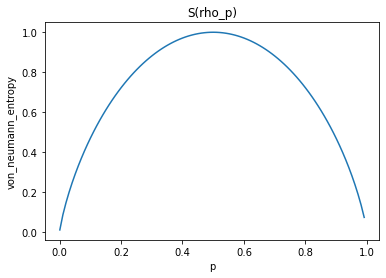

In [12]:
# plot p vs S(rho_p)
plt.xlabel('p')
plt.ylabel('Von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:blue')
plt.show()


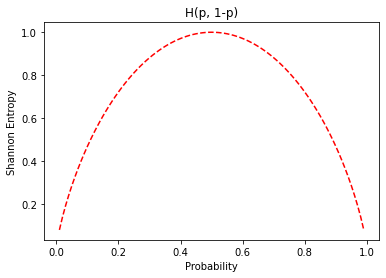

In [13]:
# compare this to the classical Shannon entropy

p = np.arange(0.01, 1., 0.01)

plt.xlabel('Probability')
plt.ylabel('Shannon Entropy')
plt.title('H(p, 1-p)')
plt.plot(p, -( p*np.log2(p) + (1-p)*np.log2(1-p) ), 'r--')
plt.show()

# Using Qiskit Using Qiskit for Studying Entropy

## Creating a GHZ-state


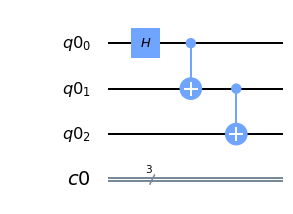

In [14]:
from qiskit import *
import numpy as np
%matplotlib inline

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

GHZ.h(0)
GHZ.cx(0,1)
GHZ.cx(1,2)
GHZ.draw(output='mpl')

In [19]:
backend = Aer.get_backend('statevector_simulator') 
GHZ_state = execute(GHZ,backend).result().get_statevector()
print(np.matrix(GHZ_state).H)

[[0.70710678-0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.70710678-0.j]]


## State vector


In [20]:
# Next, we can use Statevector() function from Qiskti to print the state vector as well. 
# This will be useful for computing the von Neumann entropy of the corresponding density matrix using the function entropy() in Qiskit.

from qiskit.quantum_info import Statevector
psi = Statevector(GHZ_state)
print(psi)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


## Density Matrix in Qiskit


In [21]:
# Next, we use the DensityMatrix() function from Qiskit by passing it the GHZ_state ket-vector we defined above.

from qiskit.quantum_info import DensityMatrix
D = DensityMatrix(GHZ_state)
print(D)

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
                0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2))


## compute the entropy using the Qiskit entropy() function


In [25]:
# Now we can compute the entropy using the Qiskit entropy() function. 
# We can pass it either the Statevector or the DensityMatrix. 

# In the second case, we get effectively zero entropy, in the first we get exactly zero. 
# This makes sense because the state is a pure state and the density matrix is computed as 𝐷=|𝜓⟩⟨𝜓|.

from qiskit.quantum_info import entropy

# Statevector
vn_entropy1 = entropy(psi, base=2)
print("\nvn_entropy1 = ")
print(vn_entropy1)

# DensityMatrix
vn_entropy2 = entropy(D, base=2)
print("\nvn_entropy2 = ")
print(vn_entropy2)



vn_entropy1 = 
0

vn_entropy2 = 
1.6017132519074586e-16


## random density matrix


In [26]:
# Finally, let’s generate a random density matrix 𝜌ρ using the Qiskit function random_density_matrix(). 
# This function's first argument is the dimension of the desired density matrix, which need not be a power of two. 
# However, in the context of quantum circuits with qubits, it is important we make this restriction manually. 
# There are of course more general systems involving things such as "qudits" which might yield arbitrary dimensional density matrices.

from qiskit.quantum_info import random_density_matrix
rho = random_density_matrix(8, rank=None, method='Hilbert-Schmidt', seed=None)
print(rho)

DensityMatrix([[ 0.15659523+0.j        , -0.01952369-0.0680313j ,
                -0.02544538+0.02723676j,  0.05464491-0.03036332j,
                 0.00412683+0.00280309j, -0.01044842+0.01336451j,
                 0.02092219+0.07315713j, -0.01703844-0.04146047j],
               [-0.01952369+0.0680313j ,  0.10163545+0.j        ,
                -0.01337762+0.01686514j,  0.00982681+0.00229465j,
                -0.03052769-0.00493328j, -0.010884  -0.04662991j,
                -0.04122769-0.00290373j,  0.02456669-0.00353341j],
               [-0.02544538-0.02723676j, -0.01337762-0.01686514j,
                 0.1157837 +0.j        , -0.08879714+0.02559668j,
                -0.05996803+0.06723072j, -0.02458548+0.01444919j,
                -0.03331822+0.00351694j, -0.00767664+0.00972435j],
               [ 0.05464491+0.03036332j,  0.00982681-0.00229465j,
                -0.08879714-0.02559668j,  0.17671066+0.j        ,
                 0.08524999-0.05468045j,  0.01960767-0.02095533j,
       

## von Neumann Entropy using the Qiskit entropy() function.


In [28]:
# von Neumann Entropy

entropy(rho, base=2)


2.142686006861768

### plot entropy


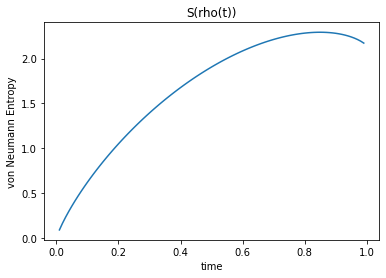

In [29]:
# Let’s plot the entropy of the system that evolved from the state given by the density matrix 𝐷 of the GHZ-state to the system described by the density matrix ρ.

time = np.arange(0.001, 1., 0.01)

vn_entropy = list()
for t in time:
    vn_entropy.append(entropy(D, base=2)*t + entropy(rho, base=2)*(1-t))

# Create list of von Neumann entropies
vn_y = list()
for value in p:
    M = value*rho + (1-value)*(D)
    vn_y.append(entropy(M))

# convert list of matrices to list of numbers for plotting
# y = list()
# for value in vn_y:
#    y.append(value.tolist()[0][0])

    
# plot p vs. S(rho_p)
plt.xlabel('time')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho(t))')
plt.plot(p, vn_y, color='tab:blue')
plt.show()

In [ ]:
# source = 
# https://towardsdatascience.com/programming-quantum-information-8f251ec6770
# https://github.com/The-Singularity-Research/entropy/blob/master/entropy.ipynb